In [1]:
import sys
import os
from pathlib import Path

%matplotlib inline
from matplotlib import pyplot as plt

root_dir = Path(os.getcwd())

if str(root_dir.parents[1]) not in sys.path:
  sys.path.append(str(root_dir.parents[1]))

from LMORL.BAN.API.agents.DQNHybrid import DQNHybrid
from LMORL.BAN.API.ban_utils import Ban

import mo_gymnasium as mo_gym

env = mo_gym.make("LunarLander-v2-mo")

In [2]:

input_size = env.observation_space.shape[0]
num_actions = int(env.action_space.n)
action_space = list(range(env.action_space.n))
learning_rate = 0.001
epsilon_decay = 0.995
epsilon_min = 0.1
batch_size = 64
train_start = 64
hidden_size = 128
BAN_SIZE = 3
max_memory_size=100

episodes=5

In [3]:
new_agent = DQNHybrid(input_size=input_size, num_actions=num_actions,
                  action_space=action_space, learning_rate=learning_rate,
                  epsilon_decay=epsilon_decay, epsilon_min=epsilon_min,
                  batch_size=batch_size, hidden_size=hidden_size,
                  ban_size=BAN_SIZE, max_memory_size=max_memory_size, train_start=100, use_legacy=False)

mname = "new.model"

rewards, avg_rewards, timings_1, infos_lists = new_agent.learning(env=env,episodes = episodes, mname=mname, replay_frequency=4, verbose=True)

12:41:28	Episode	1	timesteps:	97	Took	2.196933 sec - reward:	[-374.24521907675205, -100.0, -9.089999999999996]	| 100AvgReward: [-374.24521907675205, -100.0, -9.089999999999996]
12:41:56	Episode	2	timesteps:	70	Took	27.464345 sec - reward:	[-87.32411349342809, -100.0, -6.119999999999998]	| 100AvgReward: [-230.78466628509005, -100.0, -7.604999999999997]
12:41:56	Episode	3	timesteps:	93	Took	0.898363 sec - reward:	[-236.855725408651, -100.0, -9.12]	| 100AvgReward: [-232.80835265961036, -100.0, -8.109999999999998]
12:41:57	Episode	4	timesteps:	104	Took	1.044877 sec - reward:	[-216.30808036807633, -100.0, -11.459999999999999]	| 100AvgReward: [-228.68328458672687, -100.0, -8.947499999999998]
12:41:59	Episode	5	timesteps:	130	Took	1.177276 sec - reward:	[-25.622059890115878, -100.0, -11.789999999999994]	| 100AvgReward: [-188.0710396474047, -100.0, -9.515999999999996]


In [4]:
legacy_agent = DQNHybrid(input_size=input_size, num_actions=num_actions,
                  action_space=action_space, learning_rate=learning_rate,
                  epsilon_decay=epsilon_decay, epsilon_min=epsilon_min,
                  batch_size=batch_size, hidden_size=hidden_size,
                  ban_size=BAN_SIZE, max_memory_size=max_memory_size, train_start=100, use_legacy=True)

mname = "legacy.model"

rewards, avg_rewards, timings_2, infos_lists = legacy_agent.learning(env=env,episodes = episodes, mname=mname, replay_frequency=4, verbose=True)

12:42:59	Episode	1	timesteps:	92	Took	59.615327 sec - reward:	[-217.3804613293122, -100.0, -8.219999999999997]	| 100AvgReward: [-217.3804613293122, -100.0, -8.219999999999997]
12:45:10	Episode	2	timesteps:	85	Took	130.563963 sec - reward:	[67.1398707382622, -100.0, -7.889999999999999]	| 100AvgReward: [-75.120295295525, -100.0, -8.054999999999998]
12:50:10	Episode	3	timesteps:	98	Took	300.528985 sec - reward:	[-80.05179372662627, -100.0, -6.900000000000002]	| 100AvgReward: [-76.76412810589208, -100.0, -7.669999999999999]
12:55:41	Episode	4	timesteps:	83	Took	330.436372 sec - reward:	[-11.239842598626751, -100.0, -6.239999999999999]	| 100AvgReward: [-60.383056729075754, -100.0, -7.312499999999999]
13:01:48	Episode	5	timesteps:	73	Took	367.565105 sec - reward:	[103.94750974499871, -100.0, -7.2]	| 100AvgReward: [-27.51694343426086, -100.0, -7.289999999999999]


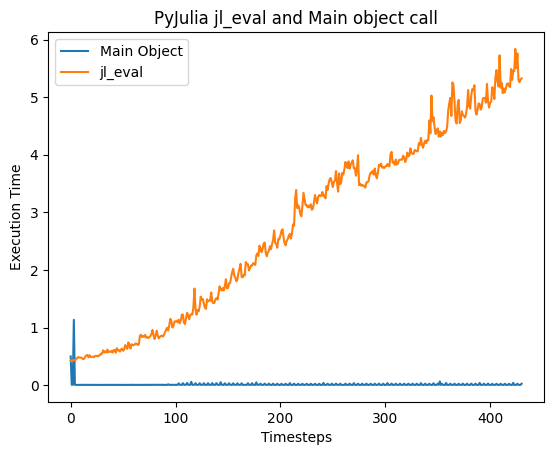

In [5]:
# plot execution time
%matplotlib inline

def display_execution_time(new_timings:list, legacy_timings:list, title:str = ""):

    #remove the maximum execution time as it is widely larger than others because of Julia object allocation
    for i in range(1):  
        new_timings.remove(max(new_timings))

    xpoints = range(len(legacy_timings)) if (len(new_timings) > len(legacy_timings)) else range(len(new_timings))
    
    ypoints_new = new_timings[:len(xpoints)]
    ypoints_legacy = legacy_timings[:len(xpoints)]
    
    fig = plt.plot(xpoints, ypoints_new)
    plt.plot(xpoints, ypoints_legacy)
    
    plt.title(title)
    plt.xlabel("Timesteps")
    plt.ylabel("Execution Time")
    plt.legend(['Main Object', 'jl_eval'])

    plt.show()
    return fig

display_execution_time(new_timings=timings_1, legacy_timings=timings_2, title="PyJulia jl_eval and Main object call")